# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

## Import praw and create connection to reddit using credentials

In [1]:
# import api warper, pandas and credentials
import praw
import pandas as pd

import credentials

In [2]:
# code directly from Week_7_FTE.ipynb, connecting into my developed applications
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

### Testing Out Results from Subreddit

In [27]:
# I chose owala as the key ward to look into because they are my girlfriend's favorite water bottle brand
owala_subreddit = reddit.subreddit('owala').hot(limit=10)

In [28]:
for post in owala_subreddit:
    print(post.title, post.score)

Welcome! please drop an intro and which owala(s) you own. 13
Owala Boot 2
Pissed to say the least 3
Water Bottle Residue Inside 1
Neptune 1
help me ID this color 9
Discount/ambassador code 1
Love my 24oz and upgraded to the 40oz in Iced Breeze🥶 18
what is the best bottle boot for neo sage? 1
Actual customers and fans of Owala missed out so scalpers could do this… 🤢 47


Comment: I thought there will be water bottle brand comparison topics......


In [31]:
#trying out the attributs in post. 
print(post.title)
print(post.permalink)

Actual customers and fans of Owala missed out so scalpers could do this… 🤢
/r/Owala/comments/16zfa38/actual_customers_and_fans_of_owala_missed_out_so/


### Create a Dictionary to Store Data

In [32]:
# create a dictionary to store these values
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}

In [33]:
#getting the max amount of owala related topics
owala_subreddit = reddit.subreddit('owala').hot(limit=None)

In [35]:
# code source directly from Week_7_FTE.ipynb, appending the infos to my dictionary
for post in list(owala_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [36]:
# converting the dictionary to dataframe
owala_df = pd.DataFrame(reddit_data)

In [39]:
#get a preview of it
owala_df.head(5)

,title,link,author,n_comments,score,text
0,Welcome! please drop an intro and which owala(...,/r/Owala/comments/u1nw27/welcome_please_drop_a...,misscellanie,47,13,
1,Owala Boot,/r/Owala/comments/17346hm/owala_boot/,yuuki_no_,2,2,Trying to find an owala boot. Any owala boot y...
2,Pissed to say the least,/r/Owala/comments/172pa7n/pissed_to_say_the_le...,Shreksasshole420,7,3,
3,Water Bottle Residue Inside,/r/Owala/comments/1714gmh/water_bottle_residue...,Pristine-Can-1403,4,1,As you can tell from the picture there is some...
4,Neptune,/r/Owala/comments/170onc0/neptune/,kimribbean,6,1,Anybody order their Neptune bottle from the “c...


In [44]:
owala_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       604 non-null    object
 1   link        604 non-null    object
 2   author      604 non-null    object
 3   n_comments  604 non-null    int64 
 4   score       604 non-null    int64 
 5   text        604 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.4+ KB


## Create SQLite Database and Analysis Using SQL queries

In [40]:
import sqlite3

In [41]:
#create a url and a database for owala(I learned this through IBM data scientists and I would like to try it for the first time)
url = r'/Users/johnxie301/Desktop/Data_Science_600/Assignment_7'
conn = sqlite3.connect(f'{url}.owala.db')

In [42]:
#creata a cursor to excute sql queries
cursor = conn.cursor()

In [43]:
#load the dataframe to sqlite database
owala_df.to_sql('owala_posts',conn,if_exists='fail',index=False)

604

In [45]:
#check if the tabel has been successfully loaded into sqlite db
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
#use fetch one because I just created this table, there should only be one table type in the master.
cursor.fetchone()

('owala_posts',)

In [46]:
#now check the table see if the data exists
cursor.execute('SELECT * FROM owala_posts LIMIT 10')
#use fetchall because we want to see all 10 columns returned
cursor.fetchall()

[('Welcome! please drop an intro and which owala(s) you own.',
  '/r/Owala/comments/u1nw27/welcome_please_drop_an_intro_and_which_owalas_you/',
  'misscellanie',
  47,
  13,
  ''),
 ('Owala Boot',
  '/r/Owala/comments/17346hm/owala_boot/',
  'yuuki_no_',
  2,
  2,
  'Trying to find an owala boot. Any owala boot you would strongly recommend?'),
 ('Pissed to say the least',
  '/r/Owala/comments/172pa7n/pissed_to_say_the_least/',
  'Shreksasshole420',
  7,
  3,
  ''),
 ('Water Bottle Residue Inside',
  '/r/Owala/comments/1714gmh/water_bottle_residue_inside/',
  'Pristine-Can-1403',
  4,
  1,
  'As you can tell from the picture there is some markings inside the water bottle right after I clean it. Can anyone tell me if this is fine, and how to get rid of it please?\nThe water bottle is an Owala 40 oz.'),
 ('Neptune',
  '/r/Owala/comments/170onc0/neptune/',
  'kimribbean',
  6,
  1,
  'Anybody order their Neptune bottle from the “cosmic collection” ?'),
 ('help me ID this color',
  '/r/Owal

In [54]:
# now try to select the topic with most score then most comments(Also practicing my sql queries just so I did not forget them after not using it for almost 6 months)
cursor.execute("SELECT title,n_comments ,ROW_NUMBER() OVER(ORDER BY n_comments DESC) AS rank_comm,score, ROW_NUMBER() OVER(ORDER BY score DESC) AS rank_score FROM owala_posts LIMIT 5")
cursor.fetchall()

[('Birthday Raffle!', 150, 1, 15, 71),
 ('Welcome! please drop an intro and which owala(s) you own.', 47, 2, 13, 82),
 ('wah missed lotsa lilac :(', 45, 3, 20, 38),
 ('Owala Color Drop Be Mine', 39, 4, 7, 180),
 ('Found out my Owala is the ugliest color in the world', 36, 5, 136, 1)]

Comment: Of course a raffle has the most comments... I am surprised so many people replied on 'the ugliest color' owala and it has the highest score. I wonder what's the color that the author called it 'the ugliest'.

In [57]:
cursor.execute("SELECT text FROM owala_posts WHERE title = 'Found out my Owala is the ugliest color in the world'")
cursor.fetchall()

[('Just yesterday, my brand new Owala Freesip Forresty bottle rolled up to my doorstep. It was love at first sight, I\'m telling you. It\'s got that unique blend of "jungle chic" meets "where\'s my latte?" and I was all about it.\n\nI decided to showcase my new accessory at the office today, which - little did I know - was set to become a fashion runway of sorts.\n\nEnter my coworker - the Picasso of pixels and a graphic designer. Well, the moment his eyes hit my Owala, he gets this wide-eyed look, like he\'s just seen the abominable snowman or something. He then suggests that I run a quick Google search for \'ugliest Pantone color in the world\'.\n\nI raise an eyebrow at him - after all, what could possibly tarnish my love for my new bottle? But curiosity got the better of me. Turns out, my forest green Owala was almost a perfect match for Pantone 448 C - a color apparently so repugnant, it won the crown for the world\'s ugliest color.\n\nHere\'s the kicker, though. Australia uses thi

In [58]:
#All good with SQL, time to close the connection so it doesnt keep running in the back.
cursor.close()
conn.close()

## EDAs on this owala dataframe

<Axes: ylabel='Frequency'>

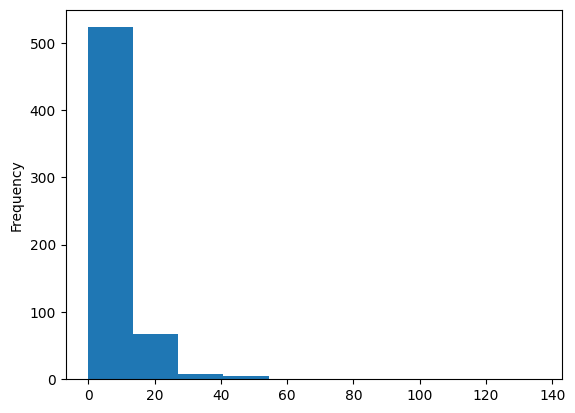

In [61]:
owala_df['score'].plot.hist()

<Axes: ylabel='Frequency'>

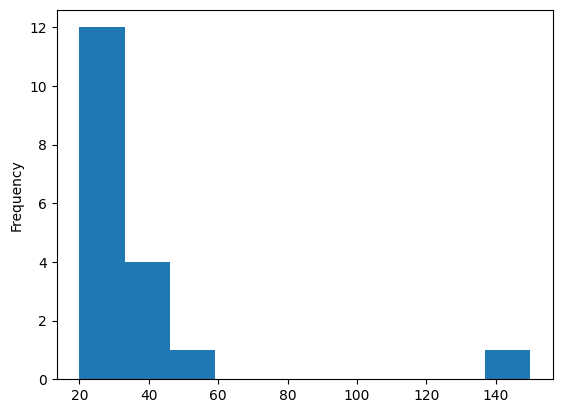

In [65]:
owala_df['n_comments'][owala_df['n_comments'] >= 20].plot.hist()

Comment: looks like owala is not a popular topic on reddit, the most commented topic was a birthday raffle

<Axes: xlabel='n_comments', ylabel='score'>

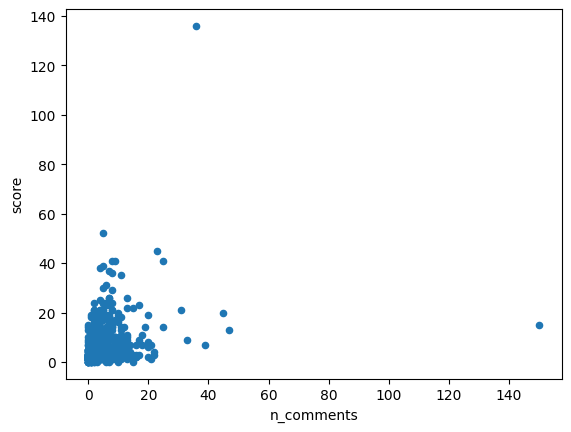

In [66]:
owala_df.plot.scatter(x= 'n_comments', y= 'score')

<Axes: xlabel='author'>

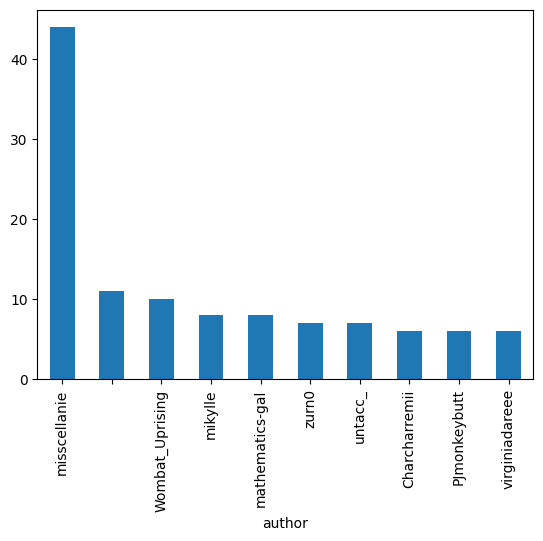

In [67]:
owala_df['author'].value_counts()[:10].plot.bar()

Comment: Looks like miss Cellanie is a really big fan of owala. Let's check on all her titles see if she is a marketing person for owala.

In [69]:
owala_df['title'][owala_df['author'] == 'misscellanie']

0      Welcome! please drop an intro and which owala(...
218                      Loving my desert sunrise bottle
226                         We reached 1,000 members!!!!
273                                     DIY kids freesip
278    New colors at Sam's Club (and such a great dea...
320    Solar coaster's base is actually a midnight bl...
374                        Freesip cap on 14oz kids flip
385    photos of proof of ownership required for rese...
420                         User: Opening-Ad-4965 banned
428                        Please be careful of scammers
498    Sneak peek of their 2023 birthday bash (i hope...
523                           Wow we've hit 250 members!
556     Color Drop! Velvet Moon - Drops 1/24 at 10AM MST
558     Color Drop! 80's Sofa 32oz - drops 1/10 10AM MST
559    Color Drop! Rad Robot 32oz - drops 12/13 10AM MST
565                          Color drop: Extraordi-berry
567    Chatty rainforest dropping 11/8 at 11AM EST (l...
569      Another Color Drop : S

Comment: We can almost certain she is one of the marketing person. Ok now I kinda want one of those special color ways. All their colorways are so nice, now I really wonder how ugly is the ugliest colorway for owala.


In [74]:
# I pull up the link because I really wanted to see
owala_df['link'][owala_df['title'].str.contains('ugliest')]

149    /r/Owala/comments/15ga5dg/found_out_my_owala_i...
Name: link, dtype: object

Comment: Looks like they did not put in a photo for it. But the author did mention the colorway to be 'freesip forresty'. I looked it up and I have to agree with him. It is not the worst but it does look somewhat ugly.

## More Analysis Using nltk

In [76]:
#pip install nltk

In [84]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnxie301/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
#input in the list of stopwords into stops
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [100]:
#input in all the words from title column that are separated by a blank space and lowerspace them so words are more inclusive.
words = ' '.join(owala_df['title']).lower().split()
# select all the words in 'words' that are not in the set 'stops'
cleaned_words = [i for i in words if i not in set(stops)]
#return the most common 20 words from the frequency dist.
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('owala', 81),
 ('iso', 56),
 ('color', 51),
 ('bottle', 49),
 ('anyone', 43),
 ('new', 39),
 ('boot', 33),
 ('literally', 28),
 ('oz', 27),
 ('good', 24),
 ('40oz', 23),
 ('drop', 21),
 ('freesip', 20),
 ('32oz', 20),
 ('lid', 18),
 ('glows', 18),
 ('tumbler', 17),
 ('first', 17),
 ('looking', 17),
 ('bottles', 16)]

In [109]:
# nothing surprises me on the most common words. Instead, I want to keep looking at other common words
dict(cleaned_fd.most_common()[20:40])

{'birthday': 15,
 'know': 14,
 'get': 14,
 'egg': 14,
 'water': 13,
 '40': 13,
 'free': 12,
 'piece': 12,
 '32': 11,
 'mine': 11,
 '-': 11,
 'love': 10,
 'missed': 10,
 'buy': 10,
 'day': 10,
 'whole': 10,
 'bash': 10,
 'help': 9,
 'colors': 9,
 'selling': 9}

In [111]:
# birthday pops up 15 times, I want to know if it is all birthday raffle and if these are the highest comments
owala_df[['title','author','n_comments','score']][owala_df['title'].str.contains('birthday')]

,title,author,n_comments,score
35,"golden birthday, anyone selling it?",EmotionalAd4736,2,2
388,"Hi! I have purchased good egg, I’m not looking...",Th3saltiestssalt,0,3
412,anyone selling any of the birthday bottles?,sunsetstar7,2,1
441,What sizes are the birthday drop colors?,Batman4President,2,1
478,How hard is it to buy color drop / birthday ba...,-LOONA-,9,3
490,What do you guys think about birthday bash raf...,lightyearbeyond,13,7
498,Sneak peek of their 2023 birthday bash (i hope...,misscellanie,6,9


Comments: Looks like they got a series of colorways called 'birthday bash', and they do look really nice. 

## Creating 100 Posts and All comments

In [113]:
# I believe adding the comments will be more interesting. It will help with marketing too by knowing what people talks about the most. Right now my assumptions are new color ways and size?
reddit_posts_data = {'title': [],
                    'link': [],
                    'author': [],
                    'n_comments': [],
                    'score': [],
                    'text': [],
                    'id': []}

reddit_comments_data = {'author': [],
                        'score': [],
                        'text': [],
                        'post_id': []}


co_subreddit = reddit.subreddit('owala').new(limit=100)

for post in list(co_subreddit):
    reddit_posts_data['title'].append(post.title)
    reddit_posts_data['link'].append(post.permalink)
    if post.author is None:
        reddit_posts_data['author'].append(None)
    else:
        reddit_posts_data['author'].append(post.author.name)
    reddit_posts_data['n_comments'].append(post.num_comments)
    reddit_posts_data['score'].append(post.score)
    reddit_posts_data['text'].append(post.selftext)
    reddit_posts_data['id'].append(post.id)

    post.comments.replace_more(limit=None)
    for comment in post.comments:
        if comment.author is None:
            reddit_comments_data['author'].append('')
        else:
            reddit_comments_data['author'].append(comment.author.name)
        reddit_comments_data['score'].append(comment.score)
        reddit_comments_data['text'].append(comment.body)
        reddit_comments_data['post_id'].append(post.id)

post_df = pd.DataFrame(reddit_posts_data)
comment_df = pd.DataFrame(reddit_comments_data)

conn = sqlite3.connect(f'{url}.owala.db')
post_df.to_sql('new_posts', conn, if_exists='replace')
comment_df.to_sql('comments', conn, if_exists='replace')
conn.close() 

In [114]:
comment_df.head(5)

,author,score,text,post_id
0,silver_thunderstorm,2,The official one in any color you like. You ca...,17346hm
1,citrus_baby,1,a sock,17346hm
2,drjoshm,1,"I just got these ones, and they fit the 24oz n...",17346hm
3,OrdinaryQuestions,7,I've seem multiple posts lately about these bo...,172pa7n
4,AlternativeVisit8038,3,It’s real easy to fix.,172pa7n


In [120]:
post_df[['title','text']][post_df['id'] == '17346hm']

,title,text
0,Owala Boot,Trying to find an owala boot. Any owala boot y...


# Analysis

### Personal Thoughts
#### This week was really fun. I was able to review and learn to pull data from online resources and store it into dataframes and sql databases. I was working with an logistic person from my previous company and she ask about if I can create a auto refresh excel or table on power BI where she can see all the current locations and ETAs by giving a list of tracking numbers and the shipping companies she used. I think the idea is about the same. I first create accounts and get the api keys from UPS and FedEx, connect it and then pull the data out into dataframes and store it as excel files or csv files. 

### Summary of the assignment
#### This week I chose to pull topics about a water bottle brand called 'Owala' bacause that's my girlfriend's favorite water bottle brand. I was able to extract 600+ posts from reddit. In my analysis using SQL command, I found the most commented post was a birthday raffle. But the post with highest score was ugliest color way in the world. That is acutally a really eye-catching topic. In my analysis using pandas, I found that the most posted author is likely to be their marketing person because most of her posts was introducing new colorways to people. They have really interesting names for their colorways so I was actually interested in the topic and went online to look up for pictures of their colorways. I used nltk apis to try to find the words with most frequencies. I found out birthday was one of the high frequency words. Turns out it was one of their series of colorways. Overall, it was a fun experience on this assignment.